In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [5]:
# Initialization
print(f'Beginning initialization...')

# Reading GeoJSON file
print('Reading GeoJSON file...')
boundaries = gpd.read_file('../data_files/electoral_districts.geojson')
boundaries.sort_values(by=['ED_ID'])
print(f'GeoJSON file read')
print(f'Reading Population Information...')
population_information = pd.read_csv('../data_files/population_information.csv')
for row in population_information.Statistic:
    if row != 'Population - 2016':
        population_information.drop(population_information[population_information.Statistic == row].index, inplace=True)
population_information.sort_values(by=['ED_ID'])
for i in range(len(population_information)):
    population_information.ED_ID.iloc[i] = str(population_information.ED_ID.iloc[i])
print(f'Population Information read')
print(f'Merging data...')
population_information = pd.merge(boundaries, population_information, on='ED_ID', how='outer')
print(f'Population data integrated.')

Beginning initialization...
Reading GeoJSON file...
GeoJSON file read
Reading Population Information...


/tmp/ipykernel_78183/1325520869.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_information.ED_ID.iloc[i] = str(population_information.ED_ID.iloc[i])


Population Information read
Merging data...
Population data integrated.


In [ ]:
# Metres to Hectares
population_information = population_information.assign(
    Area_HA = [
        0.0001 * population_information.Shape__Area[i]
        for i in range(len(population_information)) 
    ]
)

In [75]:
# Creates new gdf with log of population density column

population_information_with_density = population_information.assign(
    density = [
        np.abs(np.log(population_information.VALUE[i] / population_information.Area_HA[i])) # Calculate abs of log of population density
        for i in range(len(population_information)) 
    ]
)

<Axes: title={'center': 'Population Density ($\\log_{10}\\frac{P}{A}$)'}>

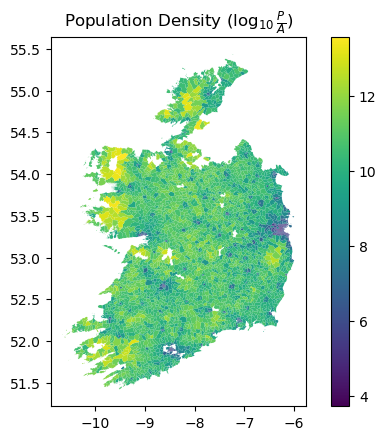

In [76]:
plt.figure()

ax = plt.subplot()

ax.set_title('Population Density ($\\log_{10}\\frac{P}{A}$)')

population_information_with_density.plot(ax = ax, column='density', legend=True,  cmap='viridis')

In [79]:
population_information_with_density.PRO

AttributeError: 'GeoDataFrame' object has no attribute 'province'

In [56]:
mu = np.mean(population_information_with_density.VALUE)
total_pop = np.sum(population_information_with_density.VALUE)
pop_var = [(mu - population_information.VALUE[i])**2/total_pop for i in range(len(population_information))]
np.nansum(pop_var)

3883.068658380324

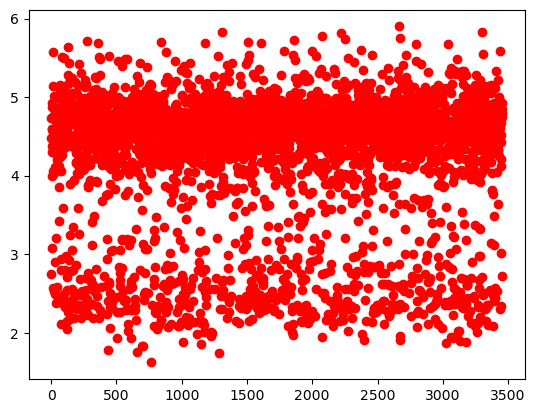

In [72]:
plt.plot(range(len(population_information)), population_information_with_density.density, 'o', color='red')